Nummerpladen er: 


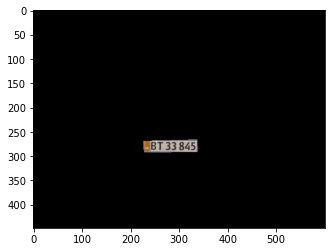

In [2]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

#Import image and resize it
img = cv2.imread('./images/test2.jpg', cv2.IMREAD_COLOR)
img = imutils.resize(img, width=600)

#Gray scale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Blur to reduce noise
gray = cv2.bilateralFilter(gray, 13, 15, 15)

#Edge detection
edged = cv2.Canny(gray, 30, 200)

contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

# find contours in the edged image
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]

NumberPlateCnt = None 
count = 0
# loop over contours
for c in cnts:
	# approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if the approximated contour has four points, then assume that screen is found
    if len(approx) == 4:  
        NumberPlateCnt = approx 
        break

# mask the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)


#Read the number plate
config = ('-l eng --oem 1 --psm 3')
text = pytesseract.image_to_string(new_image, config=config)
print("Nummerpladen er:",text)
plt.imshow(new_image)

cv2.waitKey(0)
cv2.destroyAllWindows()